In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

In [13]:
df1 = pd.read_excel('/content/drive/MyDrive/RSI_Google Colabs/preprocessed_raman_spectra (Experimental).xlsx')

df1.head()

,Raman Shift,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,AMUL TAZA TONED_BACTERIA_D2.txt,AMUL TONED_BACTERIA_D2.txt,HERITAGE FC LC -BACTERIA-D2.txt,HERITAGE FC-BACTERIA-D2.txt,HERITAGE SPECIAL_BACTERIA_D2.txt,HERITAGE TONED_BACTERIA_D2.txt,NANDHINI FC-BACTERIA-D2.txt,NANDHINI TONED_BACTERIA_D2.txt,NANDHINI TONED_NON BACTERIA_D2.txt
0,400.00000,6.089664,23.740307,9.230611,3.902190,1.453751,4.772983,13.092422,11.136671,3.742273,9.616667
1,401.58487,13.091442,26.848541,10.513221,4.379186,6.470513,14.264127,19.322967,10.550865,1.787166,6.644972
2,403.16974,6.568796,27.049048,14.806663,11.650799,9.822208,8.334118,10.125038,5.096393,4.240036,11.794917
3,404.75461,3.083516,26.569581,14.243110,4.840060,1.986776,0.875256,9.072654,5.914262,4.161631,8.377790
4,406.33948,2.574583,23.319263,10.430797,4.144174,1.628961,4.550876,12.307742,9.902923,5.356433,9.369173


In [14]:
df2 = pd.read_excel('/content/drive/MyDrive/RSI_Google Colabs/preprocessed_raman_spectra.xlsx')
df2.drop('Unnamed: 0' , axis = 1, inplace = True)
df2.head(5)

,Raman Shift,Amul full cream Cold 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Amul full cream RT 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Amul full cream RT after 24h 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Amul full cream after heating 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Amul full cream basic 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Amul toned milk Cold 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Amul toned milk RT 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Amul toned milk RT after 24h 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Amul toned milk after heating 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,...,Nandani toned milk Cold 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole after heating.txt,Nandani toned milk RT 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT after 24 h 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk RT after 24h 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nandani toned milk basic 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt,Nestle toned milk Cold 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk RT 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk after heating 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt,Nestle toned milk basic 532nm 50% 600g 50xL 7s 20times 400-3500cm-1 200hole.txt
0,400.083,999.317107,1073.400953,1161.083306,1720.117063,1191.077263,133.383960,154.076432,155.795956,153.347328,...,773.897010,242.025720,391.479082,520.338648,720.645394,540.634261,121.608921,70.063468,69.403219,119.087542
1,401.858,849.564562,971.072150,1067.165289,1573.605990,1018.053939,-5.150261,-61.022305,-71.257405,-85.498544,...,678.625052,137.401063,272.653611,378.287640,616.743460,435.972607,6.736977,-96.389399,-116.608988,-70.217388
2,403.630,800.020579,975.669050,1092.318690,1604.777756,1004.919175,-64.930197,-72.023900,-99.199339,-119.404417,...,608.198800,144.562117,315.705279,387.159484,555.750092,336.182377,-57.289254,-109.262265,-101.881196,-37.722318
3,405.405,758.339425,954.314490,1083.549199,1590.200901,953.847234,-99.684417,-96.574010,-16.046920,-53.095924,...,661.389669,153.763166,278.351222,414.348457,634.879559,444.854989,28.815941,-67.709324,-81.750432,-33.932896
4,407.176,777.443930,928.957012,1049.373927,1577.492519,1033.120940,13.661434,12.878926,26.394306,-9.461433,...,664.169066,171.675632,292.145716,391.988831,579.346130,413.427572,38.881189,-39.998943,-55.030768,-30.680444


In [15]:
df2["Nandini Toned RT"] = df1['NANDHINI TONED_NON BACTERIA_D2.txt']

df1.drop("NANDHINI TONED_NON BACTERIA_D2.txt" , axis = 1, inplace = True)

,Raman Shift,AKSHAYA K-ALPHA FC_BACTERIA_D2.txt,AMUL TAZA TONED_BACTERIA_D2.txt,AMUL TONED_BACTERIA_D2.txt,HERITAGE FC LC -BACTERIA-D2.txt,HERITAGE FC-BACTERIA-D2.txt,HERITAGE SPECIAL_BACTERIA_D2.txt,HERITAGE TONED_BACTERIA_D2.txt,NANDHINI FC-BACTERIA-D2.txt,NANDHINI TONED_BACTERIA_D2.txt
1,401.58487,13.091442,26.848541,10.513221,4.379186,6.470513,14.264127,19.322967,10.550865,1.787166
2,403.16974,6.568796,27.049048,14.806663,11.650799,9.822208,8.334118,10.125038,5.096393,4.240036
3,404.75461,3.083516,26.569581,14.243110,4.840060,1.986776,0.875256,9.072654,5.914262,4.161631
4,406.33948,2.574583,23.319263,10.430797,4.144174,1.628961,4.550876,12.307742,9.902923,5.356433
5,407.92435,4.375696,21.940484,9.466776,9.257196,4.072471,9.576731,19.592078,17.133857,5.174483
...,...,...,...,...,...,...,...,...,...,...
1952,3493.66060,3.244032,1.791345,2.064253,6.116687,8.133899,19.094647,3.508310,5.399072,6.179875
1953,3495.24540,3.689925,6.381187,6.805764,2.543998,4.424484,19.175403,5.471126,6.202559,9.970128
1954,3496.83030,9.508893,8.787787,8.766179,10.895341,10.783102,17.609179,0.730033,5.967372,7.379729
1955,3498.41500,12.957186,7.528464,3.947724,2.311815,4.608772,17.284934,6.539980,11.112666,11.330430


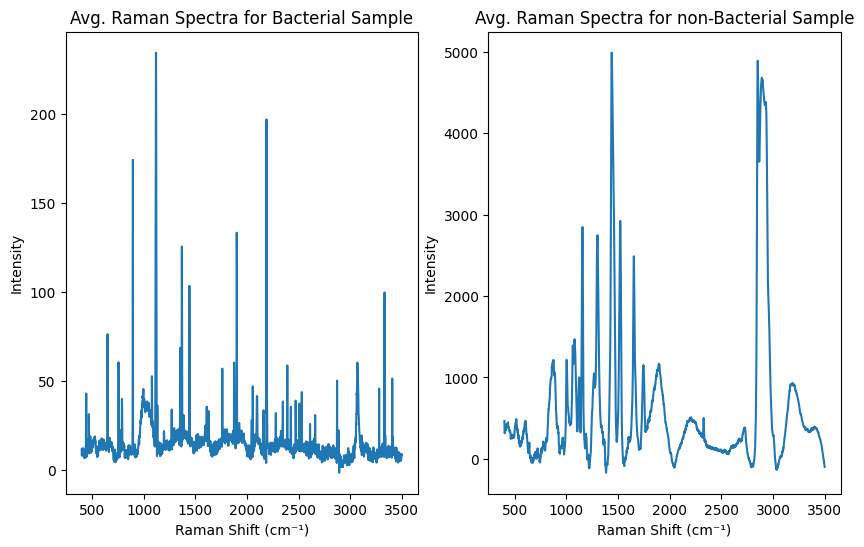

In [22]:
plt.figure(figsize=(10,6))
plt.subplot(1 , 2 , 1)
plt.title("Avg. Raman Spectra for Bacterial Sample")
sns.lineplot(y = df1[df1.columns[1:]].mean(axis = 1), x = df1['Raman Shift'])
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Intensity")
plt.subplot(1 , 2 , 2)
plt.title("Avg. Raman Spectra for non-Bacterial Sample")
sns.lineplot(y = df2[df2.columns[1:]].mean(axis = 1), x = df2['Raman Shift'])
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Intensity")
plt.show()

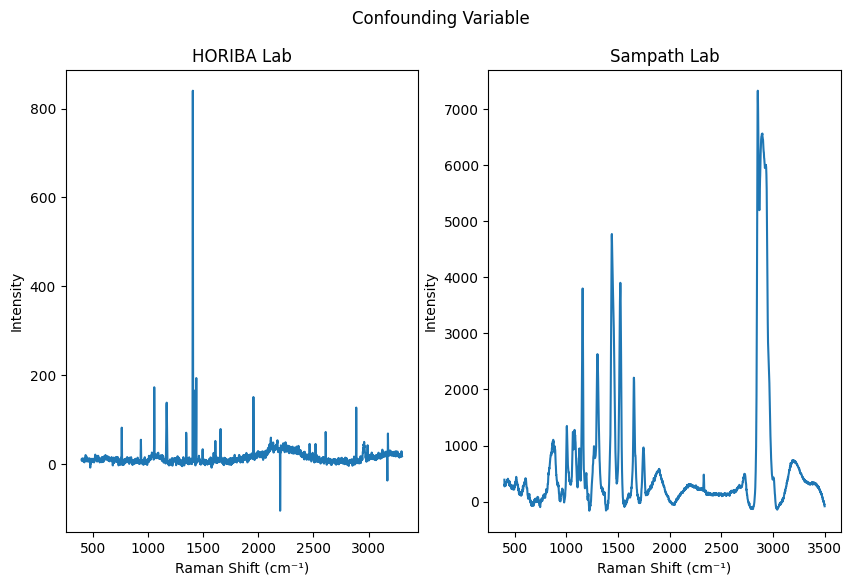

In [27]:
plt. figure(figsize=(10,6))
plt.suptitle("Confounding Variable")
plt.subplot(1,2,1)
plt.title("HORIBA Lab")
sns.lineplot(data = df2, y = 'Nandini Toned RT' , x = 'Raman Shift')
plt.ylabel("Intensity")
plt.xlabel("Raman Shift (cm⁻¹)")
plt.subplot(1,2,2)
plt.title("Sampath Lab")
sns.lineplot(data = df2, x = 'Raman Shift' , y = 'Nandani toned milk RT 532nm 50% 600g 50xL 10s 10times 400-3500cm-1 200hole.txt')
plt.ylabel("Intensity")
plt.xlabel("Raman Shift (cm⁻¹)")
plt.show()